# Stackoverflow

## Data query
Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid



In [ ]:
# !gulp stackoverflow

## Parse
use domjs to get html content, title, code, inlinecode, body. easy to extend.<br>
Merged: 0MB, 32802 Valid-Questions.

In [ ]:
# !gulp text

In [11]:
%%HTML
<iframe width="100%" height="480" frameBorder="0" src="http://localhost:3002/"></iframe>

# Preprocessing

tasks: sentence, words (+lemma | stem | raw, +blacklist, +whitelist), ngrams.<br> 

In [ ]:
# !gulp sentence

In [ ]:
# !gulp term

fig: sentence length, title term count (filtered). pro doc and sentence?,

## Tfidf 32, 11, (body, code, title...)
Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid

| Data Type more space ---                    | Description                             | Comment |
|---------------------------------------------|-----------------------------------------|--------|
|                            $c = T? B? C? $  | Question features                       | Title, Body, Code |
|               $tf = raw \lor bin \lor log$  | Term frequency variant                  |        |
|               $df = raw \lor max \lor log$  | Document frequency variant              |        |
|                            $cfg = c+tf+df$  | Configuration                           |        |
|                   $s_{cfg} \in \mathbb{N}$  | Number of Samples                       |        |
|                   $t_{cfg} \in \mathbb{N}$  | Number of terms                         |        |
|                $F \in \mathbb{S}^{t}_{cfg}$ | Feature names                           | term or ngram |
|       $X \in \mathbb{R}^{s \times t}_{cfg}$ | tf-idf                                  | for each config |

Merged: 0MB, 32802 Valid-Questions,

tfdf (3x2x [title, body, code]), raw indices!

In [ ]:
# !python3 tfidftofile.py

In [ ]:
fig: sentend length, term count (filtered) / doc sentence,

In [13]:
%%HTML
Fig: sentend length, term count (filtered) / doc sentence
<iframe width="100%" height="300" frameBorder="0" src="http://localhost:3002/visualisations/tfidf.html"></iframe>


# Classification
\begin{equation}
  Y=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ tag \in Sample \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

## Feature selection chi2 mi

featuresel 500 chi2, mi for each tag

In [ ]:
tags = ['python', 'php', 'html', 'android', 'javascript', 'sql']

In [3]:
%%HTML
<iframe width="100%" height="300" frameBorder="0" src="http://localhost:3002/"></iframe>

## Supervised Algorithms

FloatProgress(value=0.0, max=28.0)

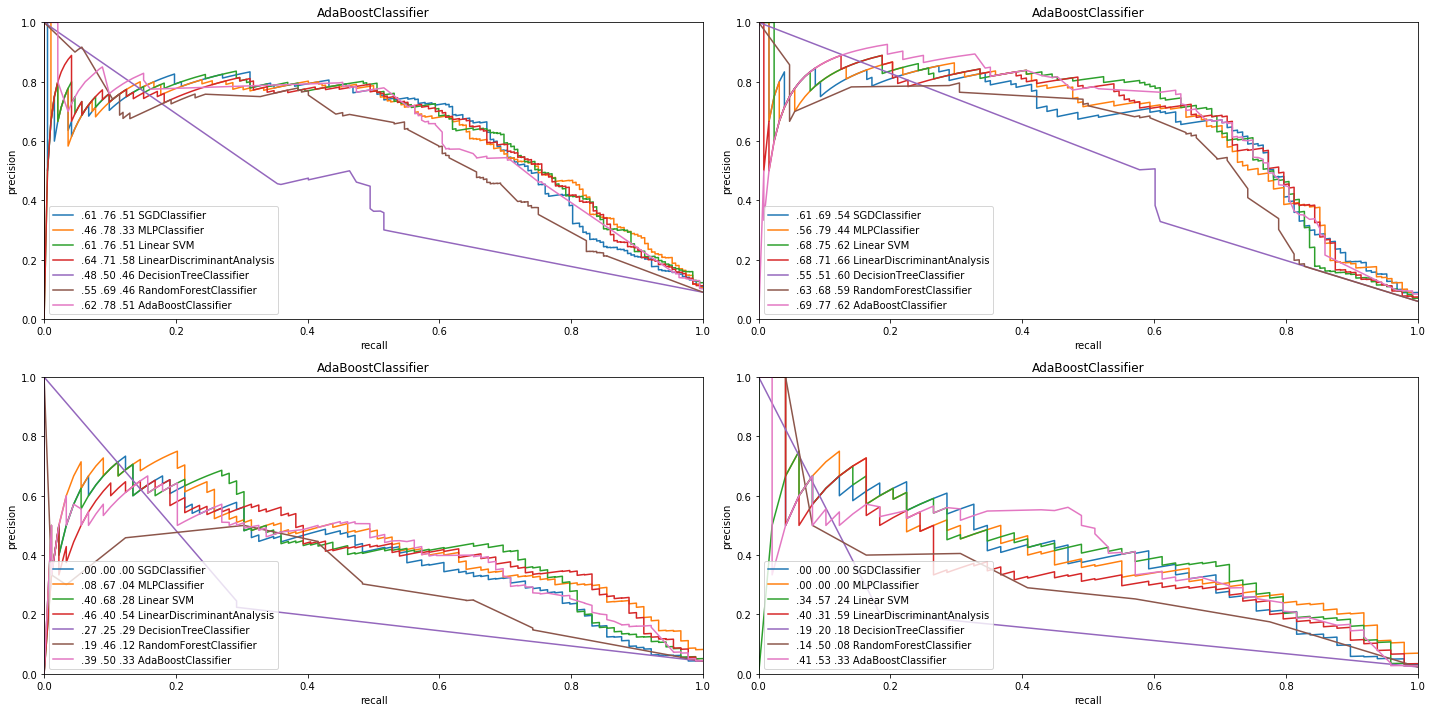

In [3]:
import classify
classify.run(['python', 'android', 'html', 'sql'])

list bad algos. reasons.

# Clustering

Load (X, Y, F) for 6 tags 'python',... and apply Classification Pipelines.<br>
These samples are sorted by 

| Data Type                           | Description                             | Comment |
|-------------------------------------|-----------------------------------------|--------|
|                 $s \in \mathbb{N}$  | Number Samples                          | random 2000   |
|                 $t \in \mathbb{N}$  | Number of terms                         | reduced by projection |
|                 $q \in \mathbb{S}$  | Analysed tags (labels)                  | ['android'] |
|          $F \in \mathbb{S}^{t}_{q}$ | Feature names                           | useless     |
|         $Y \in \mathbb{B}^{s}_{q}$  | Actual class (just for visualisations)  |             |
| $X \in \mathbb{R}^{s \times t}_{q}$ | tf-idf                                  |transformed  |

Pipeline: (pca, lda, svd, nmf) --> (agglo, kmeans, lda, gmm, dbscan) --> plotgrid(decomp x clusteralgo). <br>
find most equal to Y(q).

## Decomposition
* $t \in \mathbb{N} \longmapsto t_{r} \in \mathbb{N}$
* $F \in \mathbb{S}^{t}_{q} \longmapsto F \in \mathbb{S}^{t_{r}}_{q}$ 
* $X \in \mathbb{R}^{s \times t}_{q} \longmapsto X_{r} \in \mathbb{R}^{s \times t_{r}}_{q}$

internal dimension is for all projections the same,<br>
but varies with cluster algo.
most use 25, except DBscan, it used 5. Db scan has problems with dim > 50 in general.


## Unsupervised Algorithms

applied to each composition

Plot rrecision recall for each tag❌algo.

FloatProgress(value=0.0, max=5.0)

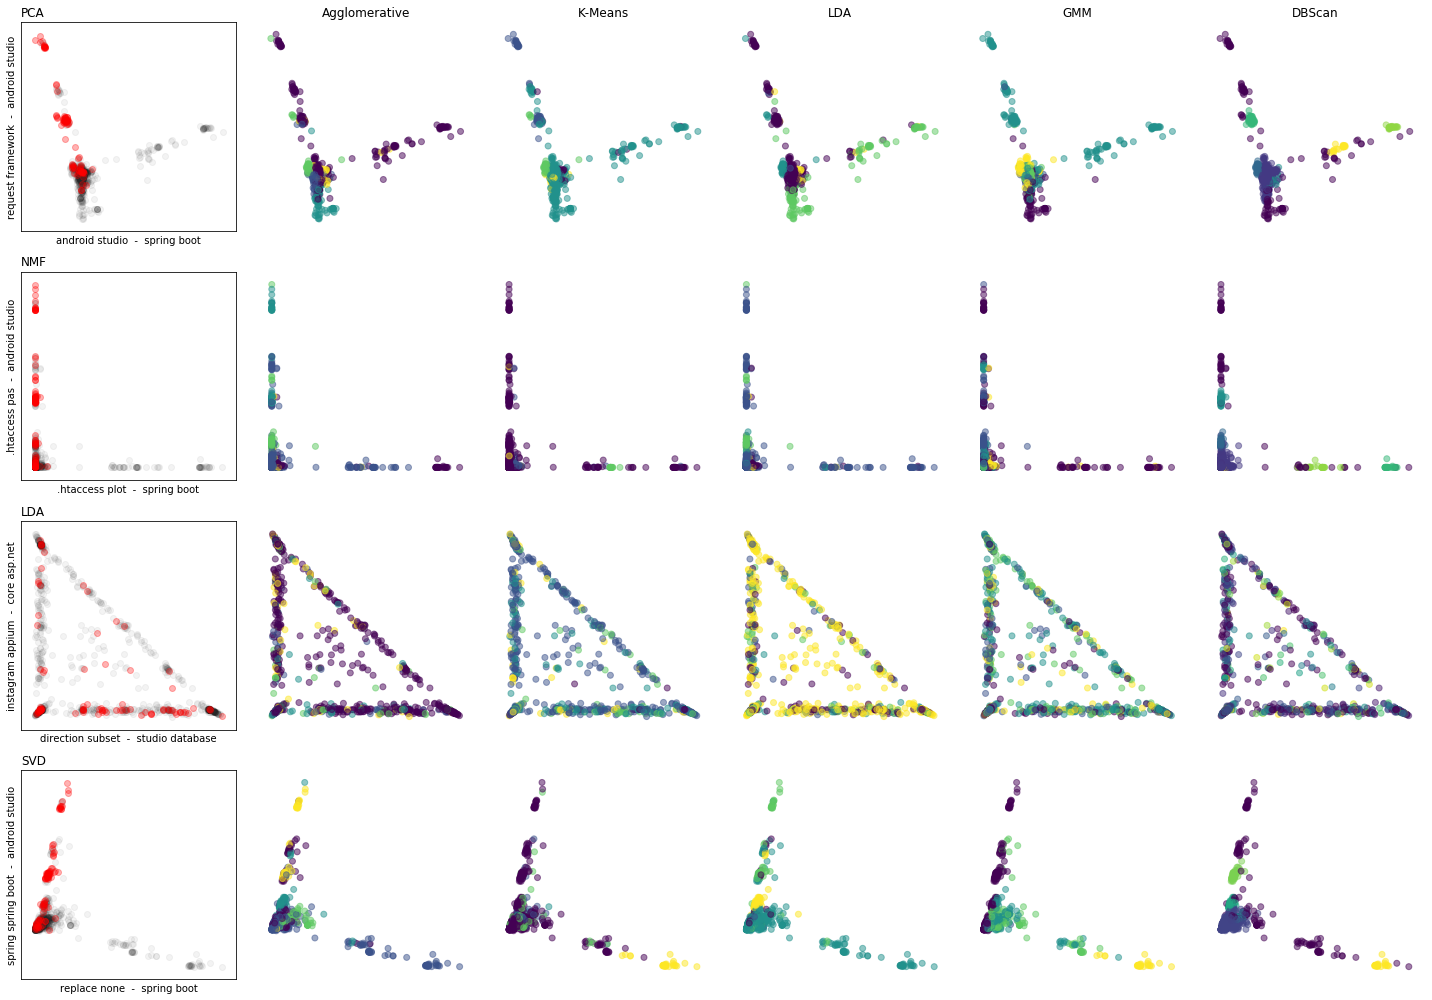

In [3]:
import cluster
cluster.run('android')

In [ ]:
find best matching cluster (maybe vary cluster count)

# Hierarchical Clustering

for each projection (svd, pca, lda) scipy.linkage(ward) algo <br>    
    --> for each node find decendantes, sum up raw tf, find top 3, safe tree

In [ ]:
import hierarchy

In [9]:
%%HTML
<iframe width="100%" height="600" frameBorder="0" src="http://localhost:3000/"></frame>

# Install

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#!gulp

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')